## Dataset overview ##

<p style="color:blue;"> First lets Import the required libraries </p>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Training Dataset

<p style="color:blue;"> After importing the required libraries we will now import the dataset </p>

In [2]:
# Load the dataset
train_data = pd.read_csv('training_set_VU_DM.csv')
train_data.head()
#test_data = pd.read_csv('test_set_VU_DM.csv')

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


<p style="color:blue;"> Lets now describe the data </p>

##### The dataset has the following columns below:
1. **srch_id** &ensp; - &ensp; Integer: The ID of the search.
2. **date_time** &ensp; - &ensp; Date/time: Date and time of the search.
3. **site_id** &ensp; - &ensp; Integer: ID of the Expedia point of sale (i.e., Expedia.com, Expedia.co.uk, Expedia.co.jp, etc.).
4. **visitor_location_country_id** &ensp; - &ensp; Integer: The ID of the country the customer is located.
5. **visitor_hist_starrating** &ensp; - &ensp; Float: The mean star rating of hotels the customer has previously purchased; null signifies there is no purchase history on the customer.
6. **visitor_hist_adr_usd** &ensp; - &ensp; Float: The mean price per night (in US$) of the hotels the customer has previously purchased; null signifies there is no purchase history on the customer.
7. **prop_country_id** &ensp; - &ensp; Integer: The ID of the country the hotel is located in.
8. **prop_id** &ensp; - &ensp; Integer: The ID of the hotel.
9. **prop_starrating** &ensp; - &ensp; Integer: The star rating of the hotel, from 1 to 5, in increments of 1. A 0 indicates the property has no stars, the star rating is not known, or cannot be publicized.
10. **prop_review_score** &ensp; - &ensp; Float: The mean customer review score for the hotel on a scale out of 5, rounded to 0.5 increments. A 0 means there have been no reviews, null that the information is not available.
11. **prop_brand_bool** &ensp; - &ensp; Integer: +1 if the hotel is part of a major hotel chain; 0 if it is an independent hotel.
12. **prop_location_score1** &ensp; - &ensp; Float: A (first) score outlining the desirability of a hotel’s location.
13. **prop_location_score2** &ensp; - &ensp; Float: A (second) score outlining the desirability of the hotel’s location.
14. **prop_log_historical_price** &ensp; - &ensp; Float: The logarithm of the mean price of the hotel over the last trading period. A 0 will occur if the hotel was not sold in that period.
15. **price_usd** &ensp; - &ensp; Float: Displayed price of the hotel for the given search. Note that different countries have different conventions regarding displaying taxes and fees, and the value may be per night or for the whole stay.
16. **promotion_flag** &ensp; - &ensp; Integer: +1 if the hotel had a sale price promotion specifically displayed.
17. **srch_destination_id** &ensp; - &ensp; Integer: ID of the destination where the hotel search was performed.
18. **srch_length_of_stay** &ensp; - &ensp; Integer: Number of nights stay that was searched.
19. **srch_booking_window** &ensp; - &ensp; Integer: Number of days in the future the hotel stay started from the search date.
20. **srch_adults_count** &ensp; - &ensp; Integer: The number of adults specified in the hotel room.
21. **srch_children_count** &ensp; - &ensp; Integer: The number of (extra occupancy) children specified in the hotel room.
22. **srch_room_count** &ensp; - &ensp; Integer: Number of hotel rooms specified in the search.
23. **srch_saturday_night_bool** &ensp; - &ensp; Boolean: +1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e., weekend); otherwise 0.
24. **srch_query_affinity_score** &ensp; - &ensp; Float: The log of the probability a hotel will be clicked on in Internet searches (hence the values are negative). A null signifies there are no data (i.e., hotel did not register in any searches).
25. **orig_destination_distance** &ensp; - &ensp; Float: Physical distance between the hotel and the customer at the time of search. A null means the distance could not be calculated.
26. **random_bool** &ensp; - &ensp; Boolean: +1 when the displayed sort was random, 0 when the normal sort order was displayed.
27. **comp1_rate** &ensp; - &ensp; Integer: +1 if Expedia has a lower price than competitor 1 for the hotel; 0 if the same; -1 if Expedia’s price is higher than competitor 1; null signifies there is no competitive data.
28. **comp1_inv** &ensp; - &ensp; Integer: +1 if competitor 1 does not have availability in the hotel; 0 if both Expedia and competitor 1 have availability; null signifies there is no competitive data.
29. **comp1_rate_percent_diff** &ensp; - &ensp; Float: The absolute percentage difference (if one exists) between Expedia and competitor 1’s price (Expedia’s price the denominator); null signifies there is no competitive data.
30. **comp2_rate** &ensp; - &ensp; (Same format as comp1_rate, for competitor 2 through 8)
31. **comp2_inv** &ensp; - &ensp; (Same format as comp1_inv, for competitor 2 through 8)
32. **comp2_rate_percent_diff** &ensp; - &ensp; (Same format as comp1_rate_percent_diff, for competitor 2 through 8)
33. **position** &ensp; - &ensp; Integer: Hotel position on Expedia’s search results page. This is only provided for the training data but not the test data.
34. **click_bool** &ensp; - &ensp; Boolean: 1 if the user clicked on the property, 0 if not.
35. **booking_bool** &ensp; - &ensp; Boolean: 1 if the user booked the property, 0 if not.
36. **gross_booking_usd** &ensp; - &ensp; Float: Total value of the transaction. This can differ from the price_usd due to taxes, fees, conventions on multiple day bookings, and purchase of a room type other than the one shown in the search.


## EXPLORATORY DATA ANALYSIS TRAINING SET (EDA) ## 

In [3]:
# Check the number of records and attributes
num_records, num_attributes = train_data.shape
print(f"Number of records: {num_records}")
print(f"Number of attributes: {num_attributes}")

Number of records: 4958347
Number of attributes: 54


In [4]:
#tstatistical information about the data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [5]:
# Find the minimum and maximum values for each column
min_values = train_data.min()
max_values = train_data.max()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
srch_id                                          1
date_time                      2012-11-01 00:08:29
site_id                                          1
visitor_location_country_id                      1
visitor_hist_starrating                       1.41
visitor_hist_adr_usd                           0.0
prop_country_id                                  1
prop_id                                          1
prop_starrating                                  0
prop_review_score                              0.0
prop_brand_bool                                  0
prop_location_score1                           0.0
prop_location_score2                           0.0
prop_log_historical_price                      0.0
position                                         1
price_usd                                      0.0
promotion_flag                                   0
srch_destination_id                              2
srch_length_of_stay                              1
srch_booking_wi

In [6]:
# Summary statistics
print(train_data.describe())

            srch_id       site_id  visitor_location_country_id  \
count  4.958347e+06  4.958347e+06                 4.958347e+06   
mean   1.663666e+05  9.953133e+00                 1.753405e+02   
std    9.611223e+04  7.646890e+00                 6.591625e+01   
min    1.000000e+00  1.000000e+00                 1.000000e+00   
25%    8.293600e+04  5.000000e+00                 1.000000e+02   
50%    1.665070e+05  5.000000e+00                 2.190000e+02   
75%    2.497240e+05  1.400000e+01                 2.190000e+02   
max    3.327850e+05  3.400000e+01                 2.310000e+02   

       visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
count            251866.000000         252988.000000     4.958347e+06   
mean                  3.374334            176.022659     1.739739e+02   
std                   0.692519            107.254493     6.834525e+01   
min                   1.410000              0.000000     1.000000e+00   
25%                   2.920000          

In [7]:
# Check for missing values
print(train_data.isnull().sum())

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

## DATA CLEANING ## 

Lets now deal rows with missing values

In [8]:
# Count the number of missing values in each column
missing_values = train_data.isnull().sum()

# Calculate the total number of values in each column
total_values = train_data.shape[0]

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / total_values) * 100

# Create a DataFrame to display the results
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Total Values': total_values, 'Percentage Missing': percentage_missing})
print(missing_data_df)


                             Missing Values  Total Values  Percentage Missing
srch_id                                   0       4958347            0.000000
date_time                                 0       4958347            0.000000
site_id                                   0       4958347            0.000000
visitor_location_country_id               0       4958347            0.000000
visitor_hist_starrating             4706481       4958347           94.920364
visitor_hist_adr_usd                4705359       4958347           94.897735
prop_country_id                           0       4958347            0.000000
prop_id                                   0       4958347            0.000000
prop_starrating                           0       4958347            0.000000
prop_review_score                      7364       4958347            0.148517
prop_brand_bool                           0       4958347            0.000000
prop_location_score1                      0       4958347       

Based on the percentage of missing values, columns with missing values above a certain threshold will be candidates for dropping. The threshold to use will be 50%. 
The columns having missing values ranging from approximately 52% to 98% of the total values will be dropped these columns or retain them for further analysis.

In [9]:
# Drop missing values

# Filter columns with null percentage >= 50
columns_to_drop = percentage_missing[percentage_missing >= 50].index

# Drop columns from the dataframe
train_data.drop(columns=columns_to_drop, inplace=True)

# Optionally, you can also create a new dataframe without dropping columns by using:
# new_df = df.drop(columns=columns_to_drop)


In [10]:
print(train_data.isnull().sum())

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance      1607782
random_bool                          0
click_bool                           0
booking_bool             

In [11]:
# Impute missing values with median
median_review_score = train_data['prop_review_score'].median()
train_data['prop_review_score'].fillna(median_review_score, inplace=True)


imputing missing values with the median provides a reliable and interpretable way to handle missing data in the prop_review_score column while preserving the integrity of the dataset for subsequent analysis.

In [12]:
# Impute missing values with median
median_score = train_data['prop_location_score2'].median()
train_data['prop_location_score2'].fillna(median_score, inplace=True)


Imputing missing values with the median ensures that the imputed values fall within the range of existing scores (0 to 1) and avoids skewing the distribution of scores. This approach will help us to maintain the integrity of the column prop_location_score2 while handling missing values effectively.

In [13]:
# Impute missing values with 0
train_data['orig_destination_distance'].fillna(0, inplace=True)


Replacing missing values with zero implies that the distance between the hotel and the customer couldn't be calculated, and hence, it's treated as if the distance is zero. This approach assumes that the hotel and the customer are considered to be very close.

In [14]:
print(train_data.isnull().sum())

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
click_bool                     0
booking_bool                   0
dtype: int64


## DATA VISUALISATION ##

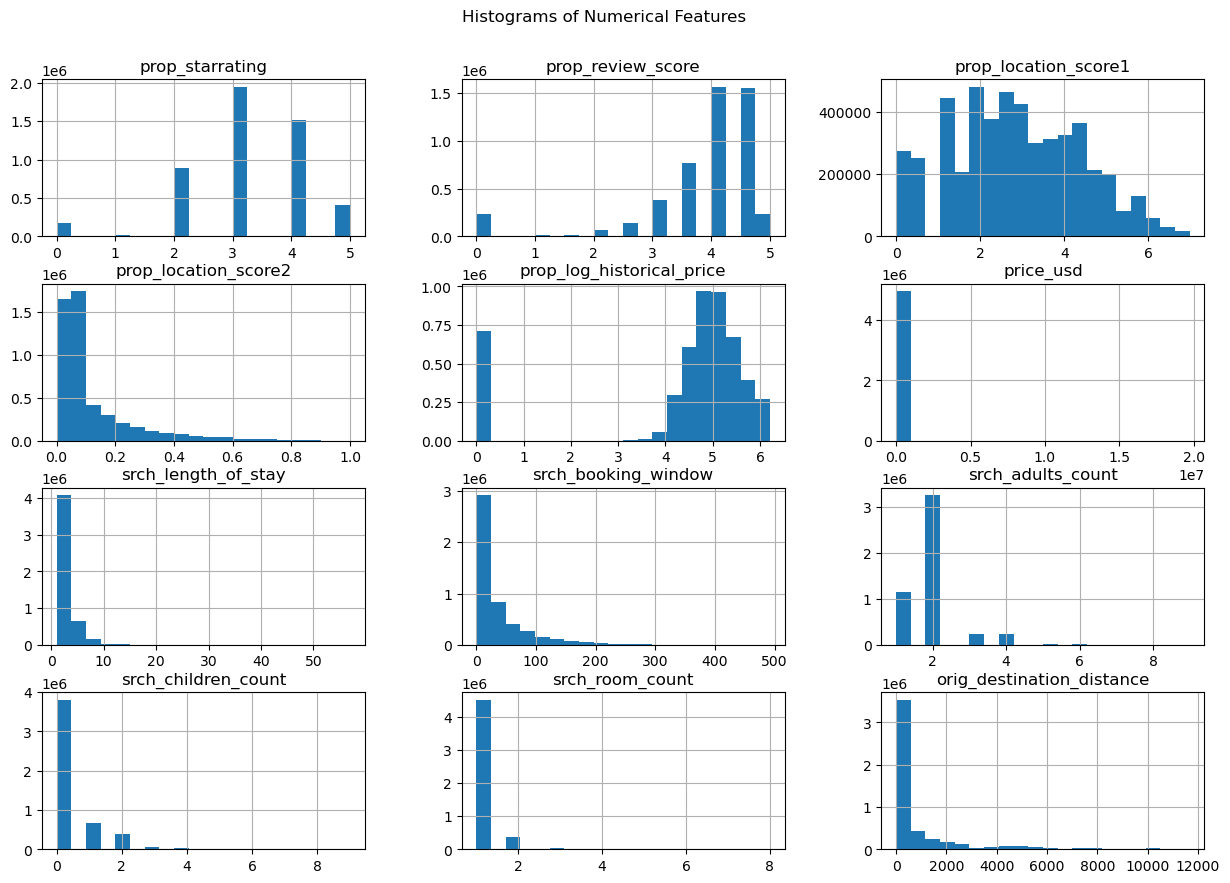

In [15]:
# Explore the distribution of numerical features
numerical_features = ['prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2',
                      'prop_log_historical_price', 'price_usd', 'srch_length_of_stay', 'srch_booking_window',
                      'srch_adults_count', 'srch_children_count', 'srch_room_count', 'orig_destination_distance']
train_data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=0.95)
plt.show()

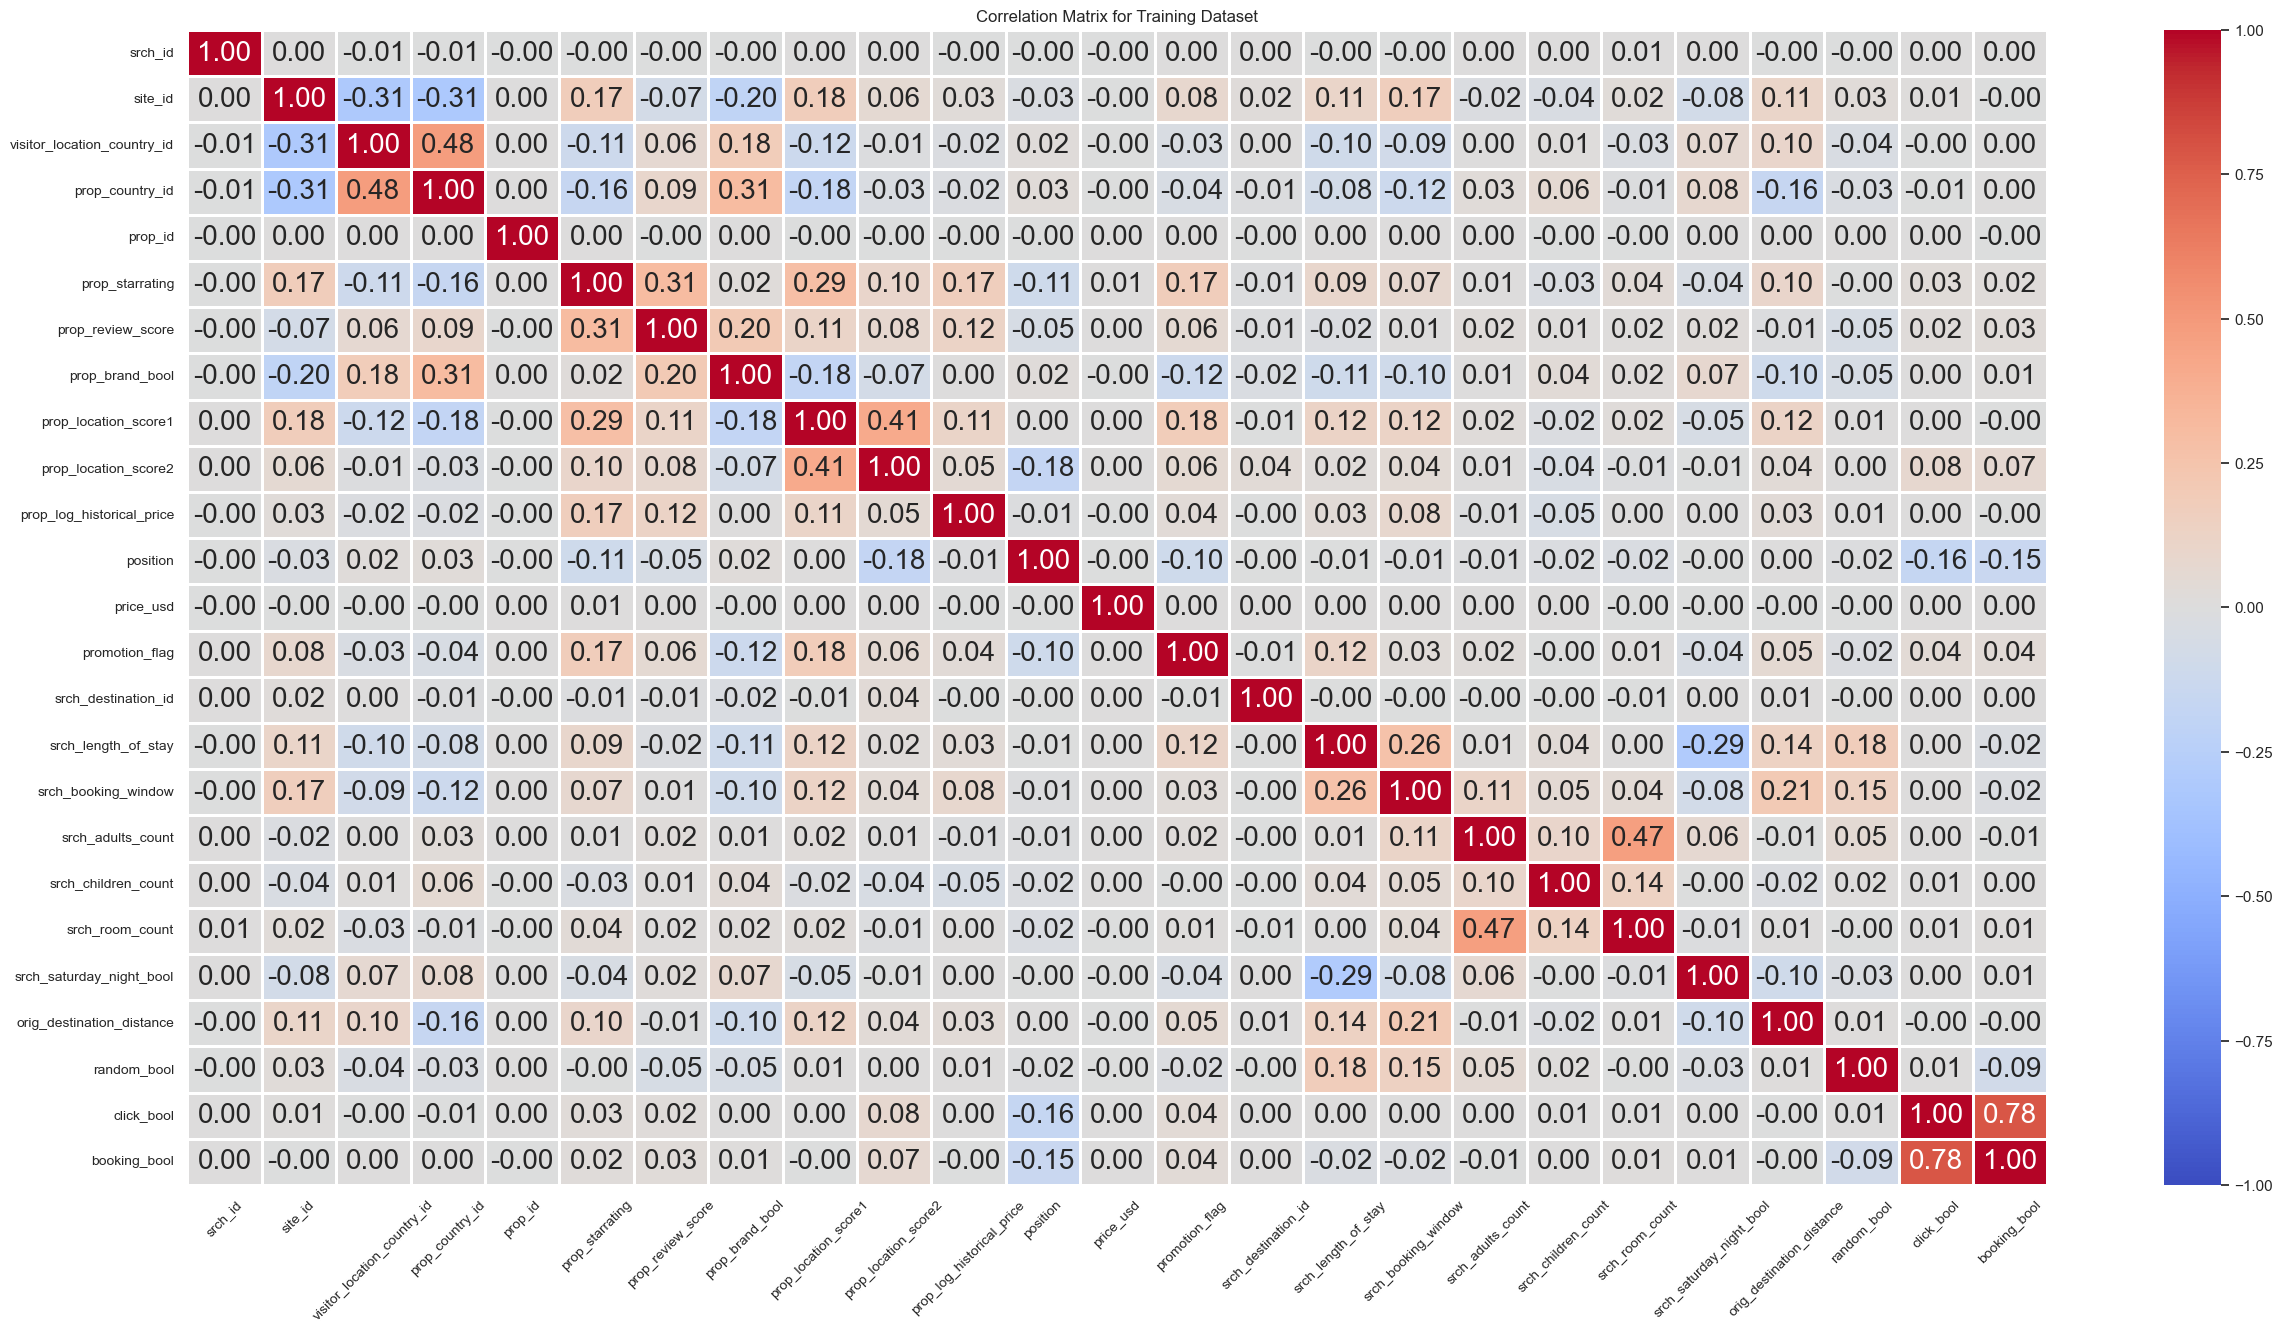

In [15]:
sns.set(rc={'figure.figsize':(30,15)})
heatmap = sns.heatmap(train_data.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f', linewidth=1, annot_kws={'size': 20})

# font size and rotation of annotations
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

plt.title('Correlation Matrix for Training Dataset')
plt.show()


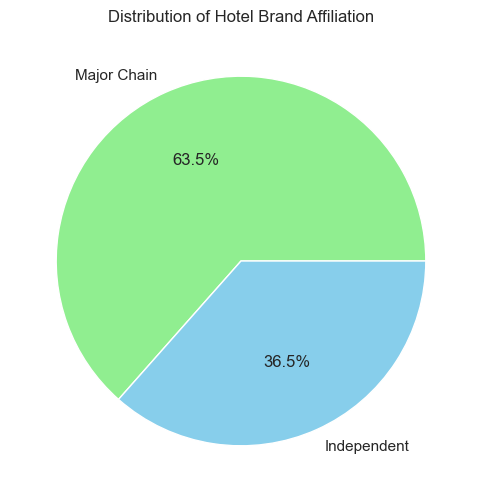

In [16]:
# Calculate counts for each category
brand_counts = train_data['prop_brand_bool'].value_counts()

# Rearrange the counts to ensure 'Major Chain' label comes first
brand_counts = brand_counts.reindex([1, 0])

# Plotting brand affiliation distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(brand_counts, labels=['Major Chain', 'Independent'], autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
plt.title('Distribution of Hotel Brand Affiliation')
plt.show()


## MODEL 1

In [17]:
# Step 1: Ranking Criteria Selection based on high to low correlations with Click_bool
ranking_criteria = ['booking_bool', 'prop_starrating', 'prop_review_score','prop_log_historical_price', 'prop_location_score1','prop_brand_bool' ]


In [18]:
# Step 2: Ranking Properties
sorted_properties = train_data.sort_values(by=ranking_criteria, ascending=False)

In [19]:
# Step 3: Predict User Preference
X = train_data[ranking_criteria]
y = train_data['click_bool']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Step 4: Submit List
predicted_preference = model.predict_proba(X_test)[:, 1]
# Reset index to align with sorted_properties
X_test.reset_index(drop=True, inplace=True)
predicted_preference = pd.Series(predicted_preference, name='predicted_preference')
# Concatenate predicted_preference with sorted_properties
sorted_properties = pd.concat([sorted_properties, predicted_preference], axis=1)
recommended_properties = sorted_properties.sort_values(by='predicted_preference', ascending=False)


In [24]:
# Step 5: Filter top recommended properties
top_n_recommendations = recommended_properties[['srch_id', 'prop_id']].head(5)

In [25]:
# Step 6: Output
print(top_n_recommendations.to_string(index=False))

 srch_id  prop_id
   49419    80930
   47815   123675
    4706    44977
   18444   106487
   23415    43830


In [26]:
# Step 7: Evaluation
precision = precision_score(y_test, model.predict(X_test))
recall = recall_score(y_test, model.predict(X_test))
accuracy = accuracy_score(y_test, model.predict(X_test))

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.9776980441817926
Recall: 0.6255119953188999
Accuracy: 0.9825808988877348


The precision is quite high, indicating that when the model predicts a positive instance, it's correct around 97.7% of the time. However, the recall is lower, suggesting that the model is identifying only about 62.6% of the actual positive instances. The accuracy is high at approximately 98.3% which is good.

## Experimenting Model 1 with Gradient Boosting Machine Learning Model

Lets try with different machine learning model known as the Gradient Boosting to predict user preference

In [21]:
# Initialize and train a Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
# Step 4: Submit List
predicted_preference = model_GBC.predict_proba(X_test)[:, 1]
# Reset index to align with sorted_properties
X_test.reset_index(drop=True, inplace=True)
predicted_preference = pd.Series(predicted_preference, name='predicted_preference')
# Concatenate predicted_preference with sorted_properties
sorted_properties = pd.concat([sorted_properties, predicted_preference], axis=1)
recommended_properties = sorted_properties.sort_values(by='predicted_preference', ascending=False)


In [23]:
# Step 5: Filter top recommended properties
top_n_recommendations = recommended_properties[['srch_id', 'prop_id']].head(5)

In [24]:
# Step 6: Output
print(top_n_recommendations.to_string(index=False))

 srch_id  prop_id
    5763   108658
   23533   116822
    2239    23268
   53123    39004
    1358    98240


In [25]:
# Step 7: Evaluation
precision = precision_score(y_test, model_GBC.predict(X_test))
recall = recall_score(y_test, model_GBC.predict(X_test))
accuracy = accuracy_score(y_test, model_GBC.predict(X_test))

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 0.6248818472341
Accuracy: 0.9831919892706243


## MODEL 2

## Experimenting Model 2 USING THE Random Forest Classifier

In [26]:
# Step 1: Ranking Criteria Selection
ranking_criteria = ['booking_bool']


In [27]:
# Step 2: Ranking Properties
sorted_properties = train_data.sort_values(by=ranking_criteria, ascending=False)

In [28]:
# Step 3: Predict User Preference
X = train_data[ranking_criteria]
y = train_data['click_bool']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Step 4: Submit List
recommended_properties = sorted_properties[['srch_id', 'prop_id']]


In [31]:

# Print the top recommended properties
print(recommended_properties.head())

         srch_id  prop_id
4031381   270478    82967
4826721   323932    86150
3230159   216931     3273
1407037    94327    91889
2638581   177045    68140


In [32]:
# Step 7: Evaluation
precision = precision_score(y_test, model.predict(X_test))
recall = recall_score(y_test, model.predict(X_test))
accuracy = accuracy_score(y_test, model.predict(X_test))

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 0.6248818472341
Accuracy: 0.9831919892706243


## Experimenting Model 2 USING THE Gradient Boosting Machine Learning Model

Lets try with a different machine learning model known as the Gradient Boosting to predict user preference


In [33]:
# Initialize and train a Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
# Step 4: Submit List
predicted_preference = model_GBC.predict_proba(X_test)[:, 1]
# Reset index to align with sorted_properties
X_test.reset_index(drop=True, inplace=True)
predicted_preference = pd.Series(predicted_preference, name='predicted_preference')
# Concatenate predicted_preference with sorted_properties
sorted_properties = pd.concat([sorted_properties, predicted_preference], axis=1)
recommended_properties = sorted_properties.sort_values(by='predicted_preference', ascending=False)


In [35]:
# Step 5: Filter top recommended properties
top_n_recommendations = recommended_properties[['srch_id', 'prop_id']].head(5)

In [36]:
# Step 6: Output
print(top_n_recommendations.to_string(index=False))

 srch_id  prop_id
   17350    78253
   57816    63987
   56457    68487
   26575   125615
   57816    66158


In [37]:
# Evaluation
precision = precision_score(y_test, model_GBC.predict(X_test))
recall = recall_score(y_test, model_GBC.predict(X_test))
accuracy = accuracy_score(y_test, model_GBC.predict(X_test))

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 0.6248818472341
Accuracy: 0.9831919892706243


## CONCLUSION ## 